# Branching Neuron Models

The Branching Neuron Model extends the spatial modeling approach to represent the complex morphology of dendritic trees with multiple branches and bifurcations. Unlike the ball-and-stick model, which simplifies a neuron to a soma connected to a single unbranched dendrite, the branching model captures the elaborate arborization patterns of real neurons. This morphological complexity significantly affects how neurons integrate synaptic inputs and process information, enabling phenomena like branch-specific plasticity and dendritic computation that cannot be represented in simpler models.

## Key Properties

1. **Morphological Realism**: Represents the complex branching structure of dendritic trees
2. **Branch-Specific Processing**: Allows for independent computational operations in individual branches
3. **Non-Linear Integration**: Captures how inputs to different branches summate non-linearly
4. **Impedance Matching**: Models how branch diameters affect signal propagation at bifurcation points
5. **Compartmental Organization**: Represents functional segregation of different dendritic regions
6. **Path Multiplicity**: Accounts for multiple routes that signals can take through the dendritic tree

## Mathematical Description

The branching model extends the cable equation to a tree structure with boundary conditions at branch points:

For each branch segment i:
λi²(∂²Vi/∂x²) = τm(∂Vi/∂t) + Vi - Vrest

At each branch point where parent branch p connects to daughter branches d1, d2, ...:
1. Voltage continuity: Vp(xend) = Vd1(0) = Vd2(0) = ...
2. Current conservation: (1/ri,p)(∂Vp/∂x)|x=xend = Σj(1/ri,dj)(∂Vdj/∂x)|x=0

Parameters:
- Vi(x,t): Membrane potential at position x on branch i at time t
- Vrest: Resting membrane potential (typically -70 mV)
- rm: Specific membrane resistance (typically 10,000-40,000 Ω·cm²)
- ri: Intracellular resistivity (typically 70-300 Ω·cm)
- cm: Specific membrane capacitance (typically 0.9-1.0 μF/cm²)
- di(x): Diameter of branch i at position x (typically 0.2-2 μm)
- Li: Length of branch i (varies widely, typically 10-300 μm per segment)
- Bi: Set of daughter branches connected to the terminal end of branch i
- λi(x) = sqrt(rm·di(x)/(4·ri)): Position-dependent length constant
- τm = rm·cm: Membrane time constant (typically 10-50 ms)
- Rall's 3/2 power law (optional): Σj(dj^3/2) = dp^3/2 at optimal branching points

State Variables:
- Vi(x,t): Membrane potential at each position x on branch i at time t

Time and Space-related variables:
- dt: Time step for numerical integration
- dx: Spatial discretization step (may vary by branch)
- t: Current simulation time
- tmax: Maximum simulation time
- X: Position along each branch (0 ≤ X ≤ Li)

## Algorithm

1. Initialize model structure
   - Define branching topology (which branches connect to which)
   - Specify branch properties (lengths, diameters, taper)
   - Create adjacency matrix or tree data structure

2. Initialize state variables
   - Vi(x,0) = Vrest for all positions x on all branches i
   - Set soma, terminal, and branch point boundary conditions

3. Spatial discretization
   - Divide each branch i into Ni segments of appropriate length
   - Create indexing system to track branch connectivity

4. For each time step from t=0 to t=tmax:
   
   a. Apply boundary conditions
      - At soma: Specified voltage or current injection
      - At terminal ends: Typically sealed ends (∂V/∂x = 0)
      - At branch points: Apply continuity of voltage and conservation of current
   
   b. For each branch i and each interior position x:
      - Compute second spatial derivative using central difference
      - Compute temporal derivative using cable equation
   
   c. Update potentials across all branches using chosen numerical method:
      - Vi(x,t+dt) = Vi(x,t) + dt·∂Vi/∂t  (explicit Euler)
      - Or use implicit methods for better stability
   
   d. Store variables for analysis
      - Record Vi(x,t) at selected positions across the dendritic tree
   
   e. Increment time: t = t + dt

5. Analyze and visualize results
   - Plot voltage vs position along selected paths in the tree
   - Create morphology-mapped visualizations of voltage propagation
   - Calculate input impedance at different locations
   - Analyze how signals from different branches integrate at the soma

## Characteristic Behaviors

1. **Branch-Specific Processing**: Localized computation within individual branches
2. **Nonlinear Summation**: Inputs to different branches sum nonlinearly at the soma
3. **Directional Selectivity**: Different responses to centripetal vs. centrifugal signal propagation
4. **Impedance Gradients**: Signal attenuation varies along different paths in the tree
5. **Dendritic Democracy**: Compensation mechanisms that normalize inputs from different distances
6. **Coincidence Detection**: Enhanced response to simultaneous inputs to multiple branches
7. **Resonance Effects**: Branch-specific frequency responses to oscillatory inputs

## Biological Mechanisms Represented

The branching model represents:
- Realistic dendritic morphology and its functional implications
- Geometric constraints on signal propagation through the dendritic tree
- Integration of distributed synaptic inputs across the dendritic arbor
- Impact of branch diameter, tapering, and branching angles on signal processing
- Morphological determinants of neuronal computational properties
- Electrotonic compartmentalization of dendritic regions
- Functional implications of dendritic branching patterns

## Applications

The branching model is particularly useful for:
- Analyzing how dendritic morphology affects neuronal computation
- Investigating the functional role of branch-specific plasticity
- Studying dendritic integration of spatially distributed inputs
- Simulating the effects of dendritic pruning or growth on neuron function
- Connecting morphological observations from microscopy to functional properties
- Exploring structure-function relationships in different neuronal types
- Designing targeted experiments to probe branch-specific mechanisms
- Modeling neurodevelopmental or pathological changes in dendritic arborization
- Investigating the computational significance of species-specific dendritic patterns

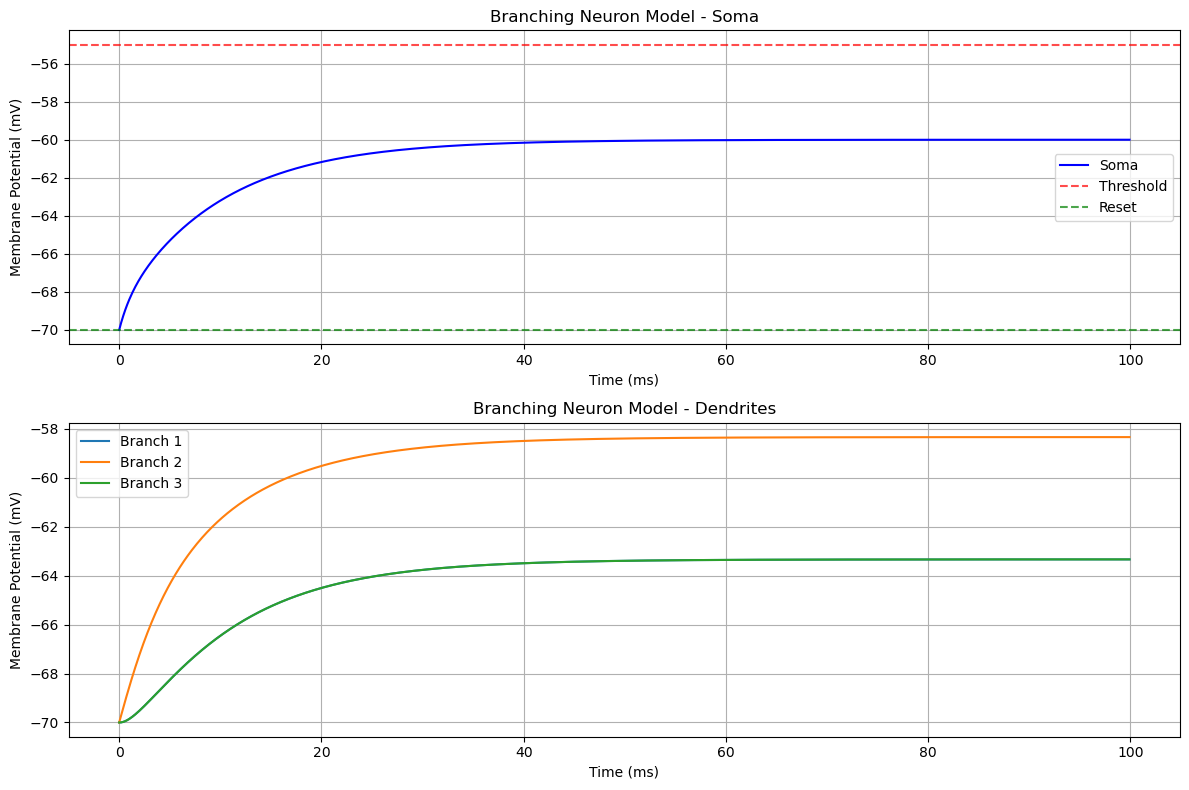

In [2]:
# Add these import statements at the beginning of your notebook
import numpy as np
import matplotlib.pyplot as plt

# Define the time steps before creating the neuron
t_max = 100  # ms
dt = 0.1  # ms
time_steps = np.arange(0, t_max, dt)

# Now the rest of your code will work

class BranchingNeuron():
    def __init__(self, n_branches, Cm, R, V_th, V_reset, V_rest, axial_R, time_steps):
        self.n_branches = n_branches  # Number of branches (dendrites)
        self.Cm = Cm                  # Membrane capacitance for each compartment
        self.R = R                    # Membrane resistance for each compartment
        self.V_th = V_th              # Threshold voltage (for soma)
        self.V_reset = V_reset        # Reset voltage
        self.V_rest = V_rest          # Resting voltage
        self.axial_R = axial_R        # Resistance between compartments
        self.tau = R * Cm             # Time constant
        self.time_steps = time_steps
        
    def simulate(self, I_soma=0, I_branches=None):
        """
        Simulate the branching neuron model
        
        Parameters:
        - I_soma: Input current to the soma
        - I_branches: List of input currents to each branch (if None, no input)
        
        Returns:
        - voltages: Dictionary of voltage traces for each compartment
        - spikes: List of spike times for the soma
        """
        # Set default branch currents if not provided
        if I_branches is None:
            I_branches = [0] * self.n_branches
        
        # Initialize voltages for each compartment (soma + branches)
        V_soma = [self.V_rest]
        V_branches = [[self.V_rest] for _ in range(self.n_branches)]
        spikes = []
        
        dt = self.time_steps[1] - self.time_steps[0]  # Time step size
        
        # Simulate for each time step
        for t_idx, t in enumerate(self.time_steps[:-1]):
            # Current voltages
            V_soma_current = V_soma[-1]
            V_branches_current = [branch[-1] for branch in V_branches]
            
            # Calculate axial currents between soma and each branch
            axial_currents = [(V_soma_current - V_branch) / self.axial_R 
                             for V_branch in V_branches_current]
            
            # Update soma voltage
            # dV/dt = (I_soma - sum(axial_currents) - (V_soma - V_rest)/R) / Cm
            soma_leak = (V_soma_current - self.V_rest) / self.R
            soma_dV = (I_soma - sum(axial_currents) - soma_leak) / self.Cm
            V_soma_next = V_soma_current + soma_dV * dt
            
            # Check for spike in soma
            if V_soma_next >= self.V_th:
                spikes.append(t + dt)
                V_soma_next = self.V_reset
            
            V_soma.append(V_soma_next)
            
            # Update branch voltages
            for i in range(self.n_branches):
                # Current in each branch: external + axial (negative of soma's)
                branch_leak = (V_branches_current[i] - self.V_rest) / self.R
                branch_dV = (I_branches[i] + axial_currents[i] - branch_leak) / self.Cm
                V_branch_next = V_branches_current[i] + branch_dV * dt
                V_branches[i].append(V_branch_next)
        
        # Package results
        voltages = {
            'soma': V_soma,
            'branches': V_branches
        }
        
        return voltages, spikes
    
    def plot_results(self, voltages, spikes):
        """Plot the simulation results"""
        import matplotlib.pyplot as plt
        
        plt.figure(figsize=(12, 8))
        
        # Plot soma voltage
        plt.subplot(2, 1, 1)
        plt.plot(self.time_steps, voltages['soma'], 'b-', label='Soma')
        
        # Plot threshold and reset lines
        plt.axhline(y=self.V_th, color='r', linestyle='--', alpha=0.7, label='Threshold')
        plt.axhline(y=self.V_reset, color='g', linestyle='--', alpha=0.7, label='Reset')
        
        # Plot spikes
        for spike in spikes:
            plt.axvline(x=spike, color='r', linestyle='-', alpha=0.5)
        
        plt.title('Branching Neuron Model - Soma')
        plt.xlabel('Time (ms)')
        plt.ylabel('Membrane Potential (mV)')
        plt.legend()
        plt.grid(True)
        
        # Plot branch voltages
        plt.subplot(2, 1, 2)
        for i, branch_v in enumerate(voltages['branches']):
            plt.plot(self.time_steps, branch_v, label=f'Branch {i+1}')
        
        plt.title('Branching Neuron Model - Dendrites')
        plt.xlabel('Time (ms)')
        plt.ylabel('Membrane Potential (mV)')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

# Create a branching neuron with 3 dendrites
branching_neuron = BranchingNeuron(
    n_branches=3,
    Cm=1,           # nF
    R=10,           # MΩ
    V_th=-55,       # mV
    V_reset=-70,    # mV
    V_rest=-70,     # mV
    axial_R=5,      # MΩ (resistance between compartments)
    time_steps=time_steps
)

# Run simulation - inject current to soma and one branch
I_soma = 2.0  # nA
I_branches = [0.0, 1.5, 0.0]  # nA (current to branch 2 only)

voltages, spikes = branching_neuron.simulate(I_soma, I_branches)

# Plot results
branching_neuron.plot_results(voltages, spikes)